In [2]:
#Import Dependencies 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt













In [3]:
#Import and read the clean csv data 
urgentcare_df=pd.read_csv("/content/urgentcare_clean.csv")
urgentcare_df.head()



,diagnosis_category,diagnosis_sub_category,treatment_category,treatment_sub_category,determination,type,age_range,patient_gender
0,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male
1,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female
2,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female
3,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female
4,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Lab Work,Upheld Decision of Health Plan,Experimental/Investigational,21-30,Male


In [4]:
#Determine the number of unique values in each column
urgentcare_df.nunique()

diagnosis_category         27
diagnosis_sub_category    145
treatment_category         30
treatment_sub_category    120
determination               2
type                        3
age_range                   7
patient_gender              2
dtype: int64

In [5]:
#Look at type value counts 
type_count= urgentcare_df["determination"].value_counts()
type_count

Overturned Decision of Health Plan    724
Upheld Decision of Health Plan        583
Name: determination, dtype: int64

In [13]:
urgentcare_df['target']=np.where(urgentcare_df["determination"]=="Upheld Decision of Health Plan", "Additional Payment", "No Additional Payment")
urgentcare_df['target'].value_counts()



No Additional Payment    724
Additional Payment       583
Name: target, dtype: int64

In [14]:
urgentcare_df['target']=np.where(urgentcare_df["target"]=="No Additional Payment", 1, 0)
urgentcare_df['target'].value_counts()

1    724
0    583
Name: target, dtype: int64

In [15]:
urgentcare_df=urgentcare_df.drop('determination', axis = 1)

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df =pd.get_dummies(urgentcare_df)
dummies_df.head()

,target,diagnosis_category_Autism Spectrum,diagnosis_category_Blood Related,diagnosis_category_Cancer,diagnosis_category_Cardiac/Circulatory,diagnosis_category_Central Nervous System/ Neuromuscular,diagnosis_category_Chronic Pain,diagnosis_category_Dental,diagnosis_category_Digestive System/ Gastrointestinal,"diagnosis_category_Ears, Nose, Throat",...,type_Urgent Care,age_range_0-10,age_range_11_20,age_range_21-30,age_range_31-40,age_range_41-50,age_range_51-64,age_range_65+,patient_gender_Female,patient_gender_Male
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
# Split our preprocessed data into our features and target arrays
y=dummies_df["target"].values 
X=dummies_df.drop('target', axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
y_train

array([1, 0, 1, ..., 1, 0, 1])

In [19]:
X_train

,diagnosis_category_Autism Spectrum,diagnosis_category_Blood Related,diagnosis_category_Cancer,diagnosis_category_Cardiac/Circulatory,diagnosis_category_Central Nervous System/ Neuromuscular,diagnosis_category_Chronic Pain,diagnosis_category_Dental,diagnosis_category_Digestive System/ Gastrointestinal,"diagnosis_category_Ears, Nose, Throat",diagnosis_category_Endocrine/ Metabolic,...,type_Urgent Care,age_range_0-10,age_range_11_20,age_range_21-30,age_range_31-40,age_range_41-50,age_range_51-64,age_range_65+,patient_gender_Female,patient_gender_Male
1292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
543,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
289,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Testing a deep neural network 

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_layer = len(X_train_scaled[0])
hidden_layer_1= 200
hidden_layer_2 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer_1, activation="relu", input_dim = input_layer))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer_2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


# Compile the model
nn.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])


# Train the model
fit_model = nn.fit (X_train_scaled, y_train, epochs= 100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               67000     
                                                                 
 dense_1 (Dense)             (None, 80)                16080     
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 83,161
Trainable params: 83,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 1s 4ms/step - loss: 0.6550 - accuracy: 0.6364
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7895
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8230
Epoch 4/100
33/33 [

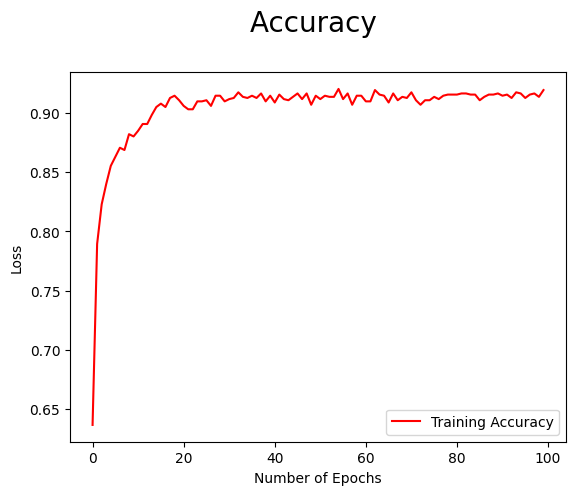

In [35]:
plt.title('Accuracy \n', fontsize=20)
plt.plot(fit_model.history['accuracy'], 'red', label='Training Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing Logistic Regression

In [22]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [23]:
# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test)

testing_predictions

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [24]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, testing_predictions)

0.7030010454461595

In [25]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix


training_matrix = confusion_matrix(y_test, testing_predictions)


print(training_matrix)

[[ 73  28]
 [ 51 110]]


In [26]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       101
           1       0.80      0.68      0.74       161

    accuracy                           0.70       262
   macro avg       0.69      0.70      0.69       262
weighted avg       0.72      0.70      0.70       262



# Testing Logistic Regression after Over Sampling the Data 

In [27]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
oversample = RandomOverSampler(sampling_strategy='minority',random_state=5)

# Fit the original training data to the random_oversampler model
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [28]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
lr_model = logistic_regression_model.fit(X_over, y_over)

# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test)

testing_predictions

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [29]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, testing_predictions)

0.7066908554209459

In [30]:
# Generate a confusion matrix for the model
training_matrix = confusion_matrix(y_test, testing_predictions)


print(training_matrix)

[[ 75  26]
 [ 53 108]]


In [31]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.59      0.74      0.66       101
           1       0.81      0.67      0.73       161

    accuracy                           0.70       262
   macro avg       0.70      0.71      0.69       262
weighted avg       0.72      0.70      0.70       262

